## Installing necessary libraries

In [ ]:
# 1. Install necessary libraries in Colab (run once)
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
! pip install textblob
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
pip install SpeechRecognition gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 20.2 MB/s eta 0:00:00


In [ ]:
!pip install gradio SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 44.8 MB/s eta 0:00:00


## Reading and concatinating CSV files

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import joblib
from transformers import pipeline as hf_pipeline
import re
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

import torch.nn.functional as F
import random
from textblob import TextBlob
import requests
from io import StringIO
import gradio as gr
import speech_recognition as sr
import json

# 1. Load datasets
df = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=14D_HcvTFL63-KffCQLNFxGH-oY_knwmo",
    delimiter=';', header=None, names=['sentence', 'label']
)
ts_df = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1Vmr1Rfv4pLSlAUrlOCxAcszvlxJOSHrm",
    delimiter=';', header=None, names=['sentence', 'label']
)

In [ ]:
df = pd.concat([df, ts_df], ignore_index=True)

# 🧹 Data Cleaning & Preprocessing

This script prepares a dataset for **natural language processing (NLP)** by checking data quality, removing duplicates, cleaning text, and splitting it into features and labels.


In [ ]:
total_rows = df.shape[0]

# % of null values
null_percent = df.isnull().mean() * 100

# % of duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_percent = (duplicate_rows / total_rows) * 100

print("Null Value Percentage:\n", null_percent)
print(f"\n📄 Duplicate Rows: {duplicate_rows} ({duplicate_percent:.2f}%)")
df.drop_duplicates(inplace=True)
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)         # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)                         # Remove @ and #
    text = re.sub(r'[^a-z\s]', '', text)                        # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()                    # Normalize spaces
    return text
df['clean_sentence'] = df['sentence'].apply(clean_text)
# Load and prepare data
X = df['clean_sentence']
y = df['label']

Null Value Percentage:
 sentence    0.0
label       0.0
dtype: float64

📄 Duplicate Rows: 1 (0.01%)




## **1️⃣ Checking Data Quality**
Before cleaning, the dataset is inspected for **missing values** and **duplicate rows**.

- **Total Rows** → `df.shape[0]`
- **Null Value Percentage** → `df.isnull().mean() * 100`  
  Finds the percentage of missing entries in each column.
- **Duplicate Rows** → `df.duplicated().sum()`  
  Counts exact duplicates in the dataset.
- **Duplicate Percentage** → `(duplicate_rows / total_rows) * 100`  
  Shows the proportion of duplicates.

💡 *In the sample output, there were no null values and only **1 duplicate row** (0.01%).*


## **2️⃣ Removing Duplicate Rows**
```python
df.drop_duplicates(inplace=True)


# 🤖 Emotion Classification Model (Transformer-based)

**Transformer-based emotion classification model** in PyTorch while implementing key **NLP & deep learning concepts** such as tokenization, vocabulary creation, padding, positional encoding, co-occurrence matrix visualization, and Bayesian-style dropout.


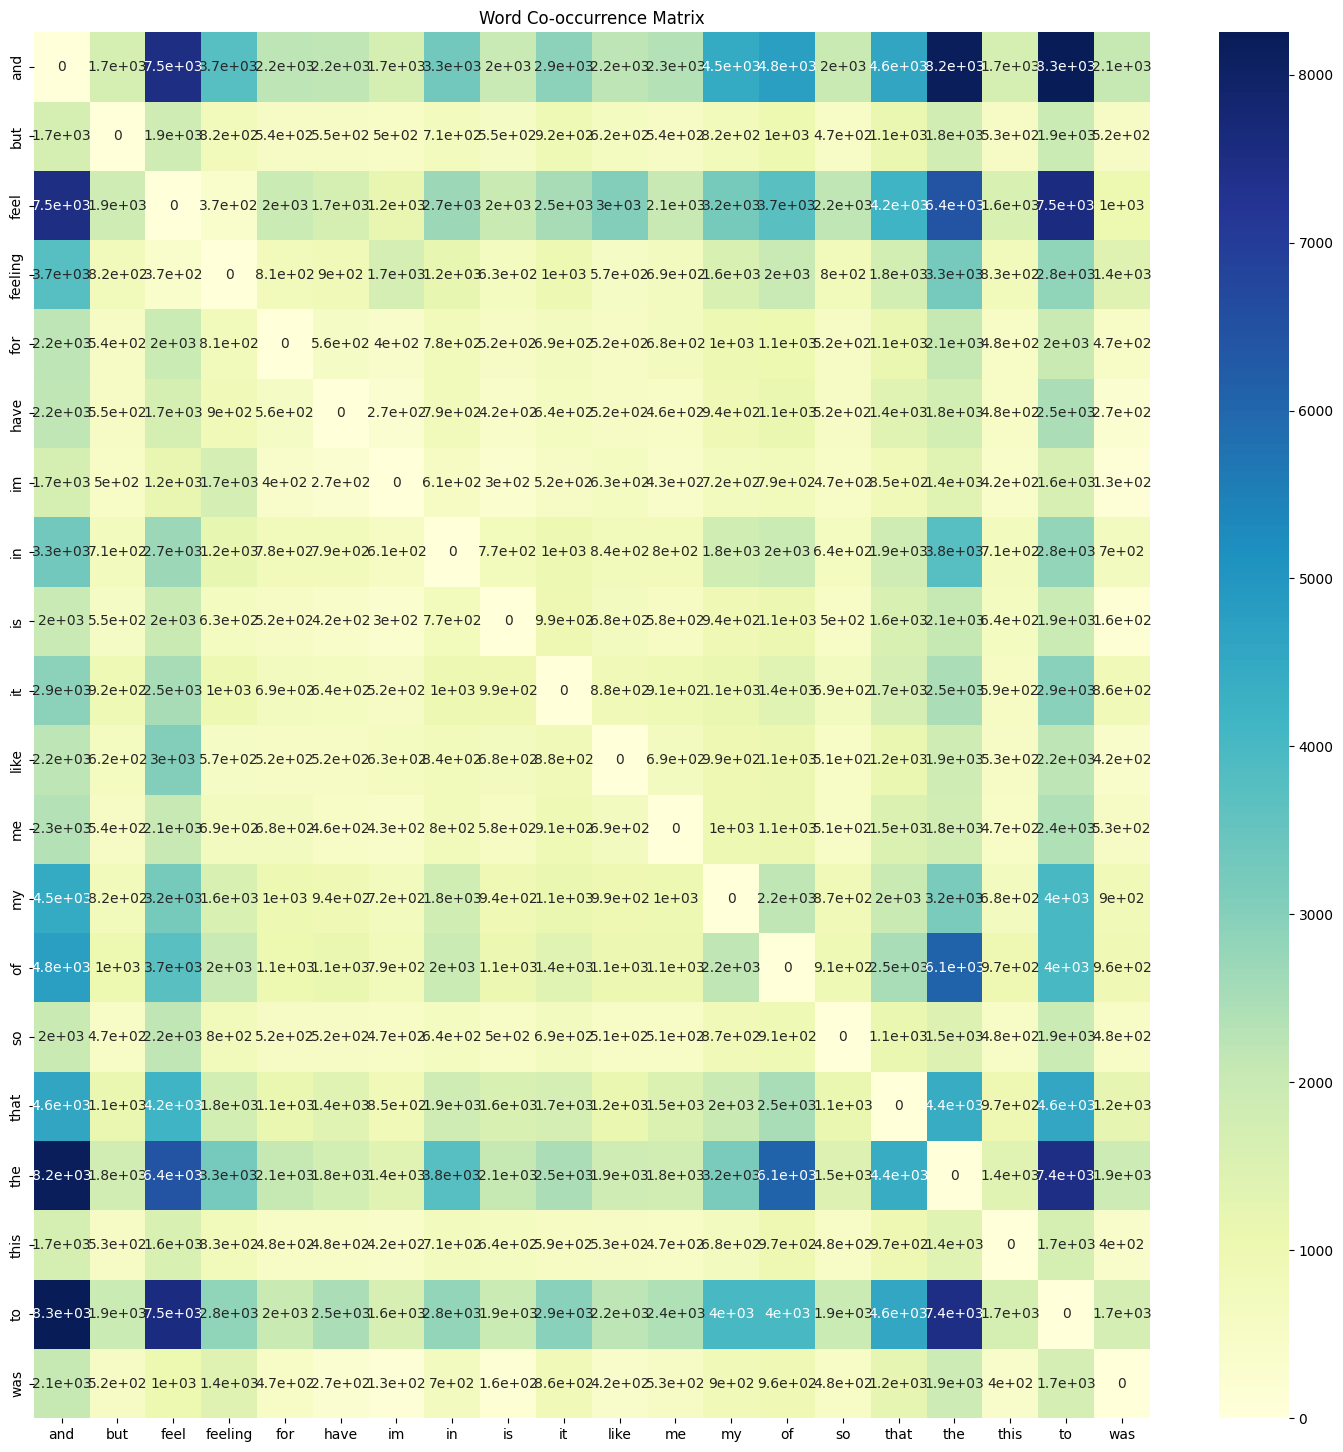

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:508: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Epoch 1 | Train Loss: 1395.6112 | Val Accuracy: 0.4528
Epoch 2 | Train Loss: 1047.4924 | Val Accuracy: 0.6686
Epoch 3 | Train Loss: 648.5841 | Val Accuracy: 0.7633
Epoch 4 | Train Loss: 419.1996 | Val Accuracy: 0.8053
Epoch 5 | Train Loss: 311.4495 | Val Accuracy: 0.8006


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === MODEL TRAINING CODE WITH REQUIRED CONCEPTS ===

tokenized = df['clean_sentence'].apply(str.split)

# --- 2. Build Vocabulary ---
vocab = Counter([token for sentence in tokenized for token in sentence])
vocab = {word: i+2 for i, (word, _) in enumerate(vocab.most_common())}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1

def encode(text):
    return [vocab.get(word, vocab['<UNK>']) for word in text]

encoded_texts = tokenized.apply(encode)

# --- 3. Pad Sequences ---
MAX_LEN = 32
def pad_sequence(seq):
    return seq[:MAX_LEN] + [vocab['<PAD>']] * max(0, MAX_LEN - len(seq))
padded = encoded_texts.apply(pad_sequence).tolist()

# --- 4. Encode Labels ---
le = LabelEncoder()
labels = le.fit_transform(df['label'])

# --- 5. Dataset + DataLoader ---
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train, X_val, y_train, y_val = train_test_split(padded, labels, test_size=0.2, stratify=labels, random_state=42)
train_loader = DataLoader(EmotionDataset(X_train, y_train), batch_size=16, shuffle=True)
val_loader = DataLoader(EmotionDataset(X_val, y_val), batch_size=16)

# --- 6. Co-occurrence Matrix (Visualization Only) ---
vectorizer = CountVectorizer(max_features=20)
X_counts = vectorizer.fit_transform(df['clean_sentence'])
X_counts = (X_counts.T * X_counts)
X_counts.setdiag(0)
plt.figure(figsize=(18, 18))
sns.heatmap(X_counts.toarray(), xticklabels=vectorizer.get_feature_names_out(),
            yticklabels=vectorizer.get_feature_names_out(), cmap="YlGnBu", annot=True)
plt.title("Word Co-occurrence Matrix")
plt.show()

# --- 7. Positional Encoding ---
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=MAX_LEN):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)].to(x.device)

# --- 8. Transformer Model with Masking + Dropout for Bayesian Inference ---
class EmotionTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab['<PAD>'])
        self.pos_encoder = PositionalEncoding(embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        mask = (x == vocab['<PAD>'])
        x = self.embedding(x)
        x = self.pos_encoder(x)
        x = self.transformer(x, src_key_padding_mask=mask)
        x = self.dropout(x.mean(dim=1))  # mean pooling
        return self.fc(x)

# --- 9. Train the Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionTransformer(len(vocab), embed_dim=64, num_heads=4, num_classes=len(le.classes_)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Val Accuracy: {correct / total:.4f}")

# Save model
torch.save(model.state_dict(), "emotion_transformer_model.pth")

# model to your local machine
from google.colab import files
files.download("emotion_transformer_model.pth")

## **1️⃣ Data Preparation**
- **Tokenization** → Split each cleaned sentence into individual words.
- **Vocabulary Building** → Use `Counter` to map words to unique integer IDs.  
  - Reserved tokens:
    - `<PAD>` → 0 (padding)
    - `<UNK>` → 1 (unknown words)
- **Text Encoding** → Replace words with their corresponding integer IDs from the vocabulary.


## **2️⃣ Padding Sequences**
- Ensure all sequences have the same length (`MAX_LEN = 32`).
- Shorter sequences → padded with `<PAD>` tokens.  
- Longer sequences → truncated.


## **3️⃣ Label Encoding**
- Convert text labels into integers using `LabelEncoder` from scikit-learn.


## **4️⃣ Dataset & DataLoader**
- Created a custom `EmotionDataset` class.
- Split into training (80%) and validation (20%) sets using `train_test_split`.
- Used PyTorch `DataLoader` for batching:
  - **Batch Size** → 16
  - **Shuffle** → True (for training data)


## **5️⃣ Co-occurrence Matrix (Visualization)**
- Used `CountVectorizer` to count word frequencies.
- Computed word co-occurrence counts and visualized them as a **heatmap** with Seaborn.


## **6️⃣ Positional Encoding**
- Implemented **sine and cosine positional encoding** to add order information to token embeddings.
- Ensures the Transformer model understands **word positions** in a sequence.


## **7️⃣ Transformer Model with Bayesian Dropout**
### **Model Components**:
- **Embedding Layer** → Converts word IDs to dense vectors.
- **Positional Encoding** → Adds positional information to embeddings.
- **Transformer Encoder** → 2 layers, multi-head attention.
- **Dropout Layer** → 0.3 probability, acts like **Bayesian regularization**.
- **Fully Connected Layer** → Outputs class logits.

### **Masking**:
- Creates a padding mask to ignore `<PAD>` tokens during attention.



## **8️⃣ Training Process**
- **Device** → GPU if available, else CPU.
- **Optimizer** → Adam (`lr=1e-3`)
- **Loss Function** → CrossEntropyLoss
- **Epochs** → 5

**Training Loop**:
1. Forward pass.
2. Compute loss.
3. Backpropagation & optimizer step.
4. Track training loss.
5. Evaluate on validation set after each epoch.



## **9️⃣ Saving the Model**
- Saved model weights with:
```python
torch.save(model.state_dict(), "emotion_transformer_model.pth")

# 🤖 EmotiBot Connect: Emotion-Aware Chatbot with Voice & Text (Chatbot logic)


In [ ]:


# ---- DUMMY MODEL, VOCAB, LABEL ENCODER (replace with real for your model) ----
vocab = {'<PAD>': 0, '<UNK>': 1, 'i': 2, 'am': 3, 'feeling': 4, 'sad': 5, 'happy': 6, 'angry': 7, 'love': 8, 'stressed': 9, 'anxious': 10}
MAX_LEN = 16
class DummyLabelEncoder:
    def __init__(self):
        self.classes_ = ['sadness', 'anger', 'love', 'happiness', 'neutral']
    def transform(self, x): return [self.classes_.index(i) for i in x]
    def inverse_transform(self, x): return [self.classes_[i] for i in x]
le = DummyLabelEncoder()

class DummyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(len(vocab), 8)
        self.fc = nn.Linear(8, len(le.classes_))
    def forward(self, x):
        x = self.embedding(x)
        x = x.mean(dim=1)
        return self.fc(x)
model = DummyModel()

def preprocess_input(text):
    tokens = text.lower().split()
    encoded = [vocab.get(token, vocab['<UNK>']) for token in tokens]
    padded = encoded[:MAX_LEN] + [vocab['<PAD>']] * max(0, MAX_LEN - len(encoded))
    return torch.tensor([padded], dtype=torch.long).to(next(model.parameters()).device)

# --- Robust CSV loading from Google Drive ---
file_id = "1yVJh_NVL4Y4YqEXGym47UCK5ZNZgVZYv"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
response = requests.get(url)
csv_text = response.text

if csv_text.strip().startswith('<'):
    raise Exception("ERROR: Google Drive link is not returning CSV! Check your sharing settings.")

solutions_df = pd.read_csv(StringIO(csv_text), header=0, on_bad_lines='skip')

used_solutions = {emotion: set() for emotion in solutions_df['emotion'].unique()}
negative_words = [
    "not", "bad", "sad", "anxious", "anxiety", "depressed", "upset", "shit", "stress",
    "worried", "unwell", "struggling", "low", "down", "terrible", "awful",
    "nervous", "panic", "afraid", "scared", "tense", "overwhelmed", "fear", "uneasy"
]

responses = {
    "sadness": [
        "It’s okay to feel down sometimes. I’m here to support you.",
        "I'm really sorry you're going through this. Want to talk more about it?",
        "You're not alone — I’m here for you."
    ],
    "anger": [
        "That must have been frustrating. Want to vent about it?",
        "It's okay to feel this way. I'm listening.",
        "Would it help to talk through it?"
    ],
    "love": [
        "That’s beautiful to hear! What made you feel that way?",
        "It’s amazing to experience moments like that.",
        "Sounds like something truly meaningful."
    ],
    "happiness": [
        "That's awesome! What’s bringing you joy today?",
        "I love hearing good news. 😊",
        "Yay! Want to share more about it?"
    ],
    "neutral": [
        "Got it. I’m here if you want to dive deeper.",
        "Thanks for sharing that. Tell me more if you’d like.",
        "I’m listening. How else can I support you?"
    ]
}

relaxation_resources = {
    "exercise": "Try this 5-4-3-2-1 grounding method:\n- 5 things you see\n- 4 you can touch\n- 3 you hear\n- 2 you smell\n- 1 you taste",
    "video": "Here’s a short calming video that might help: https://youtu.be/O-6f5wQXSu8"
}

help_keywords = ["suggest", "help", "calm", "exercise", "relax", "how can i", "any tips", "can u", "can you"]
thank_you_inputs = ["thank", "thanks", "thank you"]
bye_inputs = ["bye", "goodbye", "see you", "take care", "ok bye", "exit", "quit"]

def correct_spelling(text):
    return str(TextBlob(text).correct())

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def is_negative_input(text):
    text_lower = text.lower()
    return any(word in text_lower for word in negative_words)

def get_unique_solution(emotion):
    available = solutions_df[solutions_df['emotion'] == emotion]
    unused = available[~available['solution'].isin(used_solutions[emotion])]
    if unused.empty:
        used_solutions[emotion] = set()
        unused = available
    solution_row = unused.sample(1).iloc[0]
    used_solutions[emotion].add(solution_row['solution'])
    return solution_row['solution']

def get_emotion(user_input):
    if is_negative_input(user_input):
        return "sadness"
    sentiment = get_sentiment(user_input)
    x = preprocess_input(user_input)
    model.train()
    with torch.no_grad():
        probs = torch.stack([F.softmax(model(x), dim=1) for _ in range(5)])
        avg_probs = probs.mean(dim=0)
        prob, idx = torch.max(avg_probs, dim=1)
    pred_emotion = le.classes_[idx.item()]
    if prob.item() < 0.6:
        return "neutral"
    if sentiment < -0.25 and pred_emotion == "happiness":
        return "sadness"
    if sentiment > 0.25 and pred_emotion == "sadness":
        return "happiness"
    return pred_emotion

def audio_to_text(audio_file):
    if audio_file is None:
        return ""
    recog = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = recog.record(source)
    try:
        text = recog.recognize_google(audio)
        return text
    except Exception:
        return ""

# LLM API function
def call_llm_api(user_text):
    api_url = "https://api-inference.huggingface.co/models/distilbert-base-uncased"
    headers = {
    "Authorization": f"Bearer YOUR KEY "
}
    payload = {"inputs": user_text}
    try:
        resp = requests.post(api_url, headers=headers, json=payload, timeout=15)
        output = resp.json()
        if isinstance(output, dict) and 'error' in output:
            return "API error: " + str(output['error'])
        return str(output)
    except Exception as e:
        return f"API call failed: {e}"

GLOBAL_CONVO_HISTORY = []
USER_FEEDBACK_STATE = {}

def emoti_chat(audio, text, history_json=""):
    # --- Get user input from voice or text ---
    if text and text.strip():
        user_input = text
    elif audio is not None:
        user_input = audio_to_text(audio)
    else:
        user_input = ""
    if not user_input.strip():
        return "Please say something or type your message.", json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), ""

    user_input = correct_spelling(user_input)

    # --- Exit logic ---
    exit_phrases = ["exit", "quit", "goodbye", "bye", "close"]
    if user_input.lower().strip() in exit_phrases:
        return "Take care! I’m here whenever you want to talk. 👋", json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), gr.update(visible=False)

    # --- HuggingFace LLM API call for "fun fact" or "more about" ---
    if "fun fact" in user_input.lower() or "more about" in user_input.lower() or "api" in user_input.lower():
        api_reply = call_llm_api("Tell me a fun fact about AI.")
        return f"(LLM API response)\n{api_reply}", json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), ""

    # Feedback logic
    user_id = "default_user"
    state = USER_FEEDBACK_STATE.get(user_id, {"emotion": None, "pending": False})

    if state["pending"]:
        feedback = user_input.lower().strip()
        GLOBAL_CONVO_HISTORY[-1]["feedback"] = feedback
        if feedback == "no":
            suggestion = get_unique_solution(state["emotion"])
            reply = f"Here's another suggestion for you: {suggestion}\nDid this help? (yes/no/skip)"
            USER_FEEDBACK_STATE[user_id]["pending"] = True
            return reply, json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), ""
        else:
            USER_FEEDBACK_STATE[user_id] = {"emotion": None, "pending": False}
            return "How can I help you further?", json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), ""

    # Normal user message: get emotion, give suggestion
    pred_emotion = get_emotion(user_input)
    support = random.choice(responses.get(pred_emotion, responses["neutral"]))
    try:
        suggestion = get_unique_solution(pred_emotion)
    except Exception:
        suggestion = get_unique_solution("neutral")

    reply = f"{support}\n\nHere's a suggestion for you: {suggestion}\nDid this help? (yes/no/skip)"
    GLOBAL_CONVO_HISTORY.append({
        "user_input": user_input,
        "emotion": pred_emotion,
        "bot_support": support,
        "bot_suggestion": suggestion,
        "feedback": ""
    })
    USER_FEEDBACK_STATE[user_id] = {"emotion": pred_emotion, "pending": True}
    return reply, json.dumps(GLOBAL_CONVO_HISTORY[-5:], indent=2), ""

# ---- Gradio Web Interface ----
iface = gr.Interface(
    fn=emoti_chat,
    inputs=[
        gr.Audio(type="filepath", label="🎤 Speak your message"),
        gr.Textbox(lines=2, placeholder="Or type your message here...", label="💬 Type message"),
        gr.Textbox(lines=1, value="", visible=False)  # Hidden, passes history state
    ],
    outputs=[
        gr.Textbox(label="EmotiBot Reply"),
        gr.Textbox(label="Hidden", visible=False)
    ],
    title="EmotiBot Connect",
    description="Talk to EmotiBot using your voice or by typing. Detects your emotion, gives dynamic suggestions, remembers your feedback, and keeps a conversation history! Type 'fun fact' or 'api' for an AI-generated fact."
)

iface.launch(debug=True)

# Save conversation history at end of session
with open("conversation_history.json", "w") as f:
    json.dump(GLOBAL_CONVO_HISTORY, f, indent=2)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a2dad52c2e28f50185.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



## **1️⃣ Dummy Model, Vocabulary & Label Encoder**

- A small **dummy vocabulary** maps some common emotion-related words to IDs, with `<PAD>` and `<UNK>` tokens.
- `DummyLabelEncoder` mimics scikit-learn’s label encoder with fixed emotion classes.
- `DummyModel` is a minimal PyTorch model with an embedding layer and linear output layer predicting emotion classes.
- The `preprocess_input` function:
  - Lowercases and tokenizes input text.
  - Converts tokens to IDs with padding/truncation to `MAX_LEN=16`.


## **2️⃣ Loading Solutions CSV from Google Drive**

- Loads a CSV file of **emotion-based solutions** from a public Google Drive link.
- Raises error if CSV isn’t accessible (e.g., due to incorrect sharing).
- Stores solutions grouped by emotion in `used_solutions` dictionary to avoid repetition.


## **3️⃣ Keywords and Response Templates**

- Lists of **negative words** trigger automatic "sadness" classification.
- Predefined **responses** for emotions like sadness, anger, love, happiness, and neutral.
- Additional **relaxation resources** and keyword triggers for help requests.
- Lists of **thank you** and **goodbye** keywords for chat flow control.


## **4️⃣ Text Processing Helpers**

- `correct_spelling` uses TextBlob for basic typo correction.
- `get_sentiment` computes polarity score (-1 to +1).
- `is_negative_input` detects if input contains negative keywords.
- `get_unique_solution` samples a fresh, unused suggestion per emotion, resetting usage when all are exhausted.


## **5️⃣ Emotion Prediction Logic**

- `get_emotion` combines:
  - Negative keyword detection → forced sadness.
  - Sentiment polarity adjustment.
  - Dummy model prediction averaged over 5 stochastic passes (Bayesian style).
  - Applies logic to correct conflicting predictions based on sentiment.
  - Falls back to neutral if prediction confidence is low (< 0.6).


## **6️⃣ Audio Processing**

- Converts audio input (WAV/FLAC) to text using the Google Speech Recognition API.
- Returns empty string if audio is invalid or recognition fails.


## **7️⃣ External LLM API Integration**

- Calls HuggingFace DistilBERT API for generating “fun facts” or info when triggered by keywords.
- Handles errors gracefully and times out after 15 seconds.


## **8️⃣ Conversation State & Feedback Loop**

- Maintains global conversation history and user feedback state.
- If user feedback is negative ("no"), bot offers another suggestion for the same emotion.
- Feedback cycle continues until user responds positively or skips.


## **9️⃣ Main Chat Function: `emoti_chat`**

- Accepts audio or text input; prioritizes text if provided.
- Applies spelling correction.
- Checks for exit commands.
- Calls LLM API for specific user requests.
- Runs emotion detection, chooses appropriate support message and suggestion.
- Updates conversation history and feedback state.
- Returns chatbot reply along with conversation history in JSON.


## **🔟 Gradio Web Interface**

- Inputs:
  - Audio file for voice input.
  - Textbox for typed messages.
  - Hidden textbox for history state.
- Outputs:
  - Chatbot reply textbox.
  - Hidden JSON history.
- Title and description to guide users.
- Runs with debug enabled for easier troubleshooting.

---

## **📂 Saving Conversation History**

- Conversation logs saved to `conversation_history.json` on session end for persistence or analysis.

---

This modular approach combines simple ML with heuristic rules and external API calls to create an interactive, responsive emotional support chatbot.  